In [194]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix definition
There are two ways to define matrices in Python. 

## Python list
Python doesn't have a built-in type for matrices. However, we can treat a list of a list as a matrix. For example:

In [195]:
A = [
        [1, 2],
        [3, 4]
    ]

print(A)

[[1, 2], [3, 4]]


## NumPy Array
NumPy provides multidimensional array of numbers (which is actually an object). NumPy's array class is called ndarray.

In [196]:
B = np.array([
        [1, 2],
        [3, 4]
    ])

print(B)

[[1 2]
 [3 4]]


# Transpose

We can transpose matrices by converting rows into columns. 

In [197]:
# Transpose a python list
A_t = [
        [0, 0],
        [0, 0]
    ]

# iterate through rows
for i in range(len(A)):
   # iterate through columns
   for j in range(len(A[0])):
       A_t[j][i] = A[i][j]

print(A_t)

[[1, 3], [2, 4]]


And it's much easier if using numpy array.

In [198]:
B_t = B.T
print(B_t)

[[1 3]
 [2 4]]


# Addition

We can add one matrix to another (having the same number of dimensions)

In [199]:
C = A + A # NB: Addition of python lists will simply concatenate the two lists
print(C)
print('---')

C = A + B # We can mingle python lists with numpy arrays
print(C)

[[1, 2], [3, 4], [1, 2], [3, 4]]
---
[[2 4]
 [6 8]]


# Subtraction
Basically, the same as addition, but with minus sign. We can't subtract python lists - an exception is thrown.

In [200]:
C = A - B # We can mingle python lists with numpy arrays
print(C)

[[0 0]
 [0 0]]


# Multiply by scalar
We can multiply a matrix by a scalar value. It is expected to multiply all the values in the matrix.

In [201]:
C = 2 * A # Multipling python lists with a scalar will basically duplicate the list
print(C)
print('---')

C = 2 * B # Numpy arrays can safely be multiplied by a scalar
print(C)

[[1, 2], [3, 4], [1, 2], [3, 4]]
---
[[2 4]
 [6 8]]


# Multiply by scalar matrix

We can multiply one matrix to a matrix of scalars (with same dimensionality). It's basically the same as multiplying to scalar value, but each element in the target matrix is being multiplied with different scalar multiplier.

NB: We can't multiply python list to another python list.

In [202]:
C = [[1,5], [2,10]] * B # We can mingle multiply a python list with a numpy array
print(C)

[[ 1 10]
 [ 6 40]]


# Multiply by matrix
Matrix product of two arrays produces a new matrix. For matrix multiplication, the number of columns in the first matrix must be equal to the number of rows in the second matrix. The resulting matrix, known as the *matrix product*, has the number of rows of the first and the number of columns of the second matrix. 

In [203]:
C = np.matmul(A, B) # Matrix product of two arrays.
print(C)

[[ 7 10]
 [15 22]]


In Numpy you can achieve the matrix multiplication by using `dot()` function 
as well.

In [204]:
B.dot(A)  # A is a regular list, so it doesn't have dot() method, whiere B is a ndarray and it has this function.

array([[ 7, 10],
       [15, 22]])

Or by using `@` (at) operator as well.

In [205]:
A @ B

array([[ 7, 10],
       [15, 22]])

# Inverse Matrix

Each matrix $A$ has an inverse $A^{-1}$. The inverse matrix is defined as the reciprocal one.

$$ A \times A^{-1} = I $$

where $I$ is the Identity matrix :

$$ I = \begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix} $$

In [206]:
B_i = np.linalg.inv(B)
print(B)
print('---')
print(B_i)
print('--- The result product of the inverse matrix and the original matrix is the identity matrix')
print(np.matmul(B_i, B))

[[1 2]
 [3 4]]
---
[[-2.   1. ]
 [ 1.5 -0.5]]
--- The result product of the inverse matrix and the original matrix is the identity matrix
[[1.00000000e+00 0.00000000e+00]
 [1.11022302e-16 1.00000000e+00]]


NB: Don't get shocked by the imprecise `1` and `0` values in the inverse matrix. This is a common phenomenon for floating-point arithmetics. And, yes `1.11022302e-16` is a so small number that it is basically `0`.


# Solve Augmented Matrix

We can use `numpy.linalg.solve()` for solving linear system of equations (the so called **augmented matrix**).

$$
\left[
\begin{array}{cc|c}
1 & 2 & 4 \\
3 & 4 & 10 \\
\end{array}
\right]
$$

or

$$ \begin{bmatrix}
x + 2y = 4\\
3x + 4y = 10
\end{bmatrix} $$

In [207]:
A = np.array([
    [1, 2], 
    [3, 4]
])
B = np.array([
    [4], 
    [10]
])
np.linalg.solve(A, B)


array([[2.],
       [1.]])

In [208]:
A_inv = np.linalg.inv(A)
print(A_inv)
print('---')
print(A_inv @ B)

[[-2.   1. ]
 [ 1.5 -0.5]]
---
[[2.]
 [1.]]


# Orthogonal Vectors
We say that 2 vectors are orthogonal if they are perpendicular to each other. i.e. the **dot product of the two vectors is zero**.

In [209]:
e1, e2 = [[1, 0], [0, 1]]
print(np.dot(e1, e2))
print('---')
e1, e2 = [[3, 4], [-4, 3]]
print(np.dot(e1, e2))

0
---
0


And now let's plot the basic vectors.

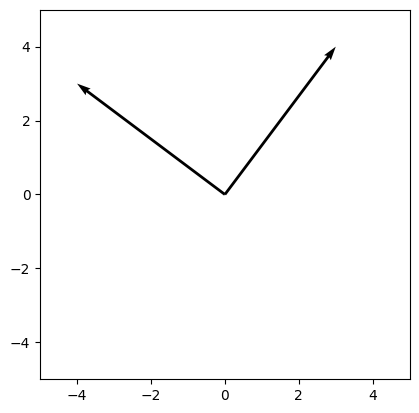

In [210]:
plt.quiver(0, 0, e1[0], e1[1], angles="xy", scale_units="xy", scale=1)
plt.quiver(0, 0, e2[0], e2[1], angles="xy", scale_units="xy", scale=1)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect("equal")
plt.show()

Visually they also look perpendicular.

# Conclusions
1. Always use **numpy arrays**. Python lists are not suitable for extensive matrix work.
2. Don't mistake `*` for `@` when multiplying matrices.
3. Get familiar with **inverse matrices** and their applications.